<a href="https://colab.research.google.com/github/neenu-wq/BHARAT_INTERN/blob/main/SMS_Classifier_Bharat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/sms_spam.csv')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [ ]:
df.shape

(5559, 2)

In [ ]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df.tail()

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [ ]:
df.dtypes

,0
type,object
text,object


In [ ]:
df.rename(columns = {'type' :'target'}, inplace = True)

In [ ]:
df.head(1)

,target,text
0,ham,Hope you are having a good week. Just checking in


In [ ]:
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...
...,...,...
5554,0,You are a great role model. You are giving so ...
5555,0,"Awesome, I remember the last time we got someb..."
5556,1,"If you don't, your prize will go to another cu..."
5557,1,"SMS. ac JSco: Energy is high, but u may not kn..."


In [ ]:
df.isna().sum()

,0
target,0
text,0


In [ ]:
df.drop_duplicates(keep = 'first' , inplace = True)
df.shape

(5156, 2)

In [ ]:
df['target'].value_counts()

,count
target,
0,4503
1,653


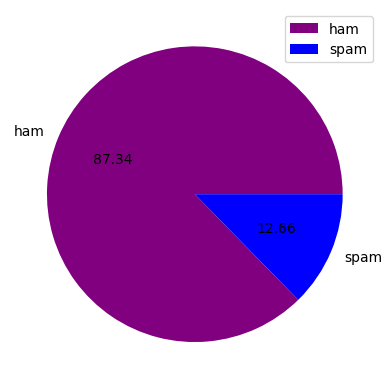

In [ ]:
Colours=['purple','blue']
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,colors=Colours,autopct = '%0.2f')
plt.legend()
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def tokenize_and_remove_stopwords(text):
  tokens=word_tokenize(text)
  tokens=[word.lower() for word in tokens if word.isalpha()]
  tokens=[word for word in tokens if word not in stopwords.words('english')]
  return ' '.join(tokens)

In [ ]:
df['clean_text']=df['text'].apply(tokenize_and_remove_stopwords)

In [ ]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(df['clean_text'])
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
MN=MultinomialNB()
MN.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=MN.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1308,   42],
       [  21,  176]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9592760180995475